In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [3]:
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28,1))

In [4]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [5]:
model = models.Sequential()


In [6]:
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))

C:\Users\Abrarali\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.add(layers.Conv2D(64, (3,3),activation='relu'))

In [8]:
model.add(layers.Flatten())

In [9]:
model.add(layers.Dense(64, activation='relu'))

In [10]:
model.add(layers.Dense(10, activation='relu'))

In [11]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
model.fit(x_train, y_train, epochs=3, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.1745 - loss: 2.6968 - val_accuracy: 0.0980 - val_loss: 2.3026
Epoch 2/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.0977 - loss: 2.3026 - val_accuracy: 0.0980 - val_loss: 2.3026
Epoch 3/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.1001 - loss: 2.3026 - val_accuracy: 0.0980 - val_loss: 2.3026


In [13]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc * 100:.2f}%")

313/313 - 1s - 2ms/step - accuracy: 0.0980 - loss: 2.3026
Test accuracy: 9.80%


In [14]:
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


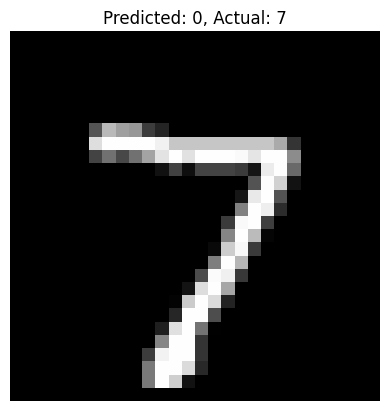

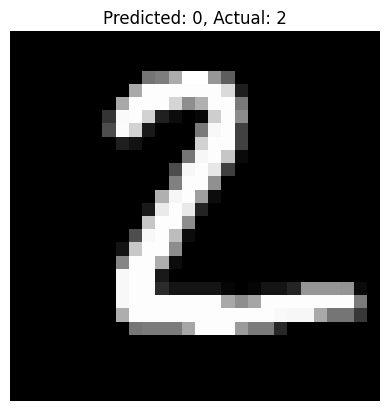

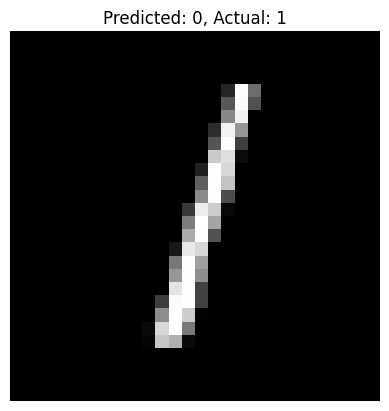

In [15]:
for i in range(3):
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {np.argmax(predictions[i])}, Actual: {y_test[i]}")
    plt.axis('off')
    plt.show()